先不管環境假設以及如何取得資料，假設就有一筆“手寫字”的資料

In [1]:
#載入資料
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

In [2]:
print "訓練資料:",len(training_data),"筆，測試資料:",len(test_data),"筆"
print "至於為什麼要這樣，簡單來說如果把所有資料拿去訓練，那最後沒有辦法評估model的效果到底是如何，所以一開始必須先遮掉一部分的答案 \
       \n注意就是Machine Learning對於監督式學習的要點就是要先知道答案，這一部分請從頭開始了解咯~"

訓練資料: 50000 筆，測試資料: 10000 筆
至於為什麼要這樣，簡單來說如果把所有資料拿去訓練，那最後沒有辦法評估model的效果到底是如何，所以一開始必須先遮掉一部分的答案        
注意就是Machine Learning對於監督式學習的要點就是要先知道答案，這一部分請從頭開始了解咯~


推薦學習清單：
<br>1. 台大林軒田教授 https://www.youtube.com/playlist?list=PLXVfgk9fNX2I7tB6oIINGBmW50rrmFTqf </br>
<br>2. Coursera Andrew Ny https://www.coursera.org/learn/machine-learning/home/welcome</br>
<br>我自己是一開始看到什麼學什麼，後來上了學校資科系的課"Data Minig"還有另一堂"數據科學及大數據分析"，後來在Coursera砍掉重練,之後會看林軒田的</br>

In [3]:
%pylab inline
#引入一些必要的套件
import numpy as np
import random
import datetime
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Data Exploration

在做任何分析之前，我們就先來看看資料的樣子,python是0-indexed的，也就是說第一筆資料是從0開始算，然後用[0]去呼叫

In [4]:
first = training_data[0]
print first

(array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 

上面那種看法太辛苦，只看到是一整串的值，所以就要想辦法了解一下

In [5]:
shape(first)

(2L,)

從上面的結果可以知道，first是一個2維的資料

In [6]:
print len(first[0]),len(first[1])

784 10


然後first的第一個資料的長度是784,第二個資料的長度是10，實際上呢，第一個資料表示的28 * 28的pixel,第二個是記錄這個手寫字是什麼號碼
<br>在把第一個資料還原成圖片之前，我們先看看這是什麼數字好了!</br>

In [7]:
first[1]

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

第二個資料（也就是first[1],再次提醒是0-indexed）顯示第6個儲存格的值是1,所以很有可能的，這張圖片就是5(0 indexed)

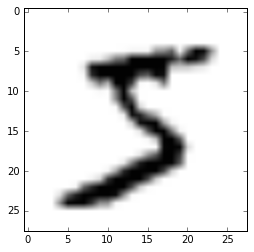

In [8]:
recover_img = np.reshape(first[0], (28, 28)) #這一段把資料還原成 28 * 28
plt.imshow(recover_img, cmap="Greys")

所以我們現在大概知道圖片的樣子，接下來就是...傳說中neural network的實現，現在就只有一層的hidden layer(傳說中黑盒子的地方)，而所謂的deep learning，則是2層或以上的neural network

In [9]:
# 這個是類神經網路的學習函數，其實不一定要用這個，但是它具有一個很特別的性質，至於是什麼就請google吧，解釋起來很長一串 XD
def sigmoid(z):
    """ The sigmoid function. """
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """ Derivative of the sigmoid function. """
    return sigmoid(z)*(1-sigmoid(z))

以下是實現的過程，建議先不要深入下去看，大概了解就好，有興趣之後去http://neuralnetworksanddeeplearning.com/chap1.html
<br>是原封不動搬過來的，裡面從頭到尾說清楚講明白</br>

In [10]:
import random

# Third-party libraries
import numpy as np

class Network(object):

    def __init__(self, sizes):
        """The list ``sizes`` contains the number of neurons in the
        respective layers of the network.  For example, if the list
        was [2, 3, 1] then it would be a three-layer network, with the
        first layer containing 2 neurons, the second layer 3 neurons,
        and the third layer 1 neuron.  The biases and weights for the
        network are initialized randomly, using a Gaussian
        distribution with mean 0, and variance 1.  Note that the first
        layer is assumed to be an input layer, and by convention we
        won't set any biases for those neurons, since biases are only
        ever used in computing the outputs from later layers."""
        self.num_layers = len(sizes)
        self.sizes = sizes
        self.biases = [np.random.randn(y, 1) for y in sizes[1:]]
        self.weights = [np.random.randn(y, x)
                        for x, y in zip(sizes[:-1], sizes[1:])]

    def feedforward(self, a):
        """Return the output of the network if ``a`` is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a

    def SGD(self, training_data, epochs, mini_batch_size, eta,
            test_data=None):
        """Train the neural network using mini-batch stochastic
        gradient descent.  The ``training_data`` is a list of tuples
        ``(x, y)`` representing the training inputs and the desired
        outputs.  The other non-optional parameters are
        self-explanatory.  If ``test_data`` is provided then the
        network will be evaluated against the test data after each
        epoch, and partial progress printed out.  This is useful for
        tracking progress, but slows things down substantially."""
        starttime = datetime.datetime.now()
        if test_data: n_test = len(test_data)
        n = len(training_data)
        for j in xrange(epochs):
            random.shuffle(training_data)
            mini_batches = [
                training_data[k:k+mini_batch_size]
                for k in xrange(0, n, mini_batch_size)]
            for mini_batch in mini_batches:
                self.update_mini_batch(mini_batch, eta)
            if test_data:
                print "Epoch {0}: {1} / {2}".format(
                    j, self.evaluate(test_data), n_test)
            else:
                print "Epoch {0} complete".format(j)
        print("\nDone!\nModel trained in %s" % (datetime.datetime.now() - starttime))  

    def update_mini_batch(self, mini_batch, eta):
        """Update the network's weights and biases by applying
        gradient descent using backpropagation to a single mini batch.
        The ``mini_batch`` is a list of tuples ``(x, y)``, and ``eta``
        is the learning rate."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        for x, y in mini_batch:
            delta_nabla_b, delta_nabla_w = self.backprop(x, y)
            nabla_b = [nb+dnb for nb, dnb in zip(nabla_b, delta_nabla_b)]
            nabla_w = [nw+dnw for nw, dnw in zip(nabla_w, delta_nabla_w)]
        self.weights = [w-(eta/len(mini_batch))*nw
                        for w, nw in zip(self.weights, nabla_w)]
        self.biases = [b-(eta/len(mini_batch))*nb
                       for b, nb in zip(self.biases, nabla_b)]

    def backprop(self, x, y):
        """Return a tuple ``(nabla_b, nabla_w)`` representing the
        gradient for the cost function C_x.  ``nabla_b`` and
        ``nabla_w`` are layer-by-layer lists of numpy arrays, similar
        to ``self.biases`` and ``self.weights``."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

    def evaluate(self, test_data):
        """Return the number of test inputs for which the neural
        network outputs the correct result. Note that the neural
        network's output is assumed to be the index of whichever
        neuron in the final layer has the highest activation."""
        test_results = [(np.argmax(self.feedforward(x)), y)
                        for (x, y) in test_data]
        return sum(int(x == y) for (x, y) in test_results)

    def cost_derivative(self, output_activations, y):
        """Return the vector of partial derivatives \partial C_x /
        \partial a for the output activations."""
        return (output_activations-y)


In [11]:
net = Network([784, 20, 10])
# 因為是28 * 28的圖片，可以把每一個pixel想象成一個input，所以有784個input,
# 而 10是因為有10個號碼所以最後要告訴我到底是哪一個，20就是傳說中的黑盒子函數，隨便用20個類神經元去模擬

In [12]:
net.SGD(training_data, 10, 20, 1.5 , test_data=test_data)

Epoch 0: 8439 / 10000
Epoch 1: 8800 / 10000
Epoch 2: 8944 / 10000
Epoch 3: 9007 / 10000
Epoch 4: 9082 / 10000
Epoch 5: 9117 / 10000
Epoch 6: 9145 / 10000
Epoch 7: 9171 / 10000
Epoch 8: 9185 / 10000
Epoch 9: 9181 / 10000

Done!
Model trained in 0:01:50.053000


上面那行其實包含很多，模型訓練、然後再把一開始的測試資料test_data餵給訓練好的model，最後再evaluate這個模型，讓演算法跑10次就（餵給SGD的第二個參數）停下來，結果就已經發現有91.8%的準確度了!

### 其實還有很多事情可以做，下次再給你看我真正有做的東西吧!因為都沒好好整理，所以沒有一個夠完整的project可以拿出來說嘴